## Разведочный анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Импортируем данные с kaggle
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().any().any()

False

Пропусков в данных нет

In [5]:
if data.duplicated().any() == True: 
    data = data.drop_duplicates()

In [6]:
data.duplicated().any()

False

Дубликатов нет

In [7]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

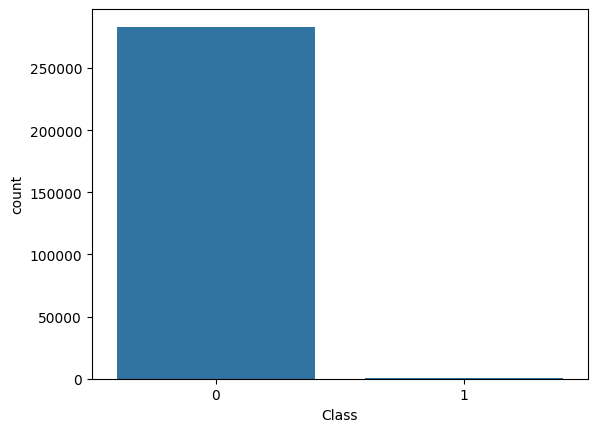

In [8]:
sns.countplot(data, x='Class')

Классы не сбалансированы, сильно превалирует класс 0

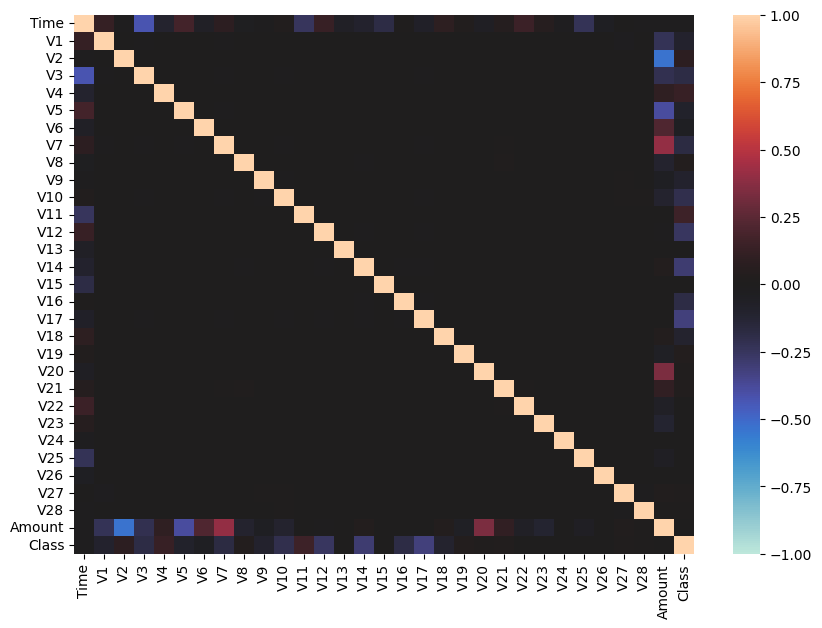

In [9]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), vmax = 1, vmin = -1, center = 0);

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Разделение данных на train и test

In [11]:
X = data.drop('Class', axis=1)
y = data['Class']

In [12]:
random_state = 42
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [13]:
abs(data.drop('Class', axis=1).describe() - X_train.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,26.252756,0.001599,0.001281,0.000238,0.000745,0.000644,0.000620,0.000295,0.001298,0.000326,...,0.000191,0.000037,0.001282,0.000042,0.000134,0.000833,0.000416,0.000215,0.000172,0.032242
std,14.089254,0.000287,0.002446,0.004100,0.001465,0.011547,0.003188,0.013174,0.000877,0.000457,...,0.001522,0.001505,0.000199,0.005229,0.000664,0.000717,0.001338,0.001252,0.000211,2.012106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.750000,0.001886,0.000836,0.000236,0.000370,0.001593,0.000449,0.000548,0.000126,0.000070,...,0.000028,0.000266,0.000465,0.000071,0.000620,0.000074,0.000620,0.000003,0.000025,0.000000
50%,33.000000,0.000309,0.000809,0.001695,0.000063,0.000522,0.001219,0.000926,0.000328,0.000047,...,0.000010,0.000007,0.000792,0.000065,0.000140,0.001818,0.000519,0.000062,0.000005,0.000000
75%,17.750000,0.000569,0.000631,0.001151,0.001555,0.002857,0.001237,0.000182,0.000876,0.000293,...,0.000093,0.000640,0.001492,0.000336,0.000865,0.001046,0.001159,0.000082,0.000077,0.170000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419436,0.000000,...,0.000000,4.587950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
abs(data.drop('Class', axis=1).describe() - X_test.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,105.009173,0.006396,0.005123,0.000951,0.002978,0.002574,0.002480,0.001180,0.005192,0.001304,...,0.000764,0.000150,0.005129,0.000169,0.000536,0.003332,0.001665,0.000860,0.000686,0.128965
std,56.125080,0.001145,0.009816,0.016502,0.005868,0.047182,0.012819,0.054161,0.003517,0.001823,...,0.006066,0.005993,0.000813,0.021366,0.002652,0.002886,0.005388,0.005045,0.000843,8.213261
min,4.000000,15.937368,30.543040,17.221905,0.082564,87.952174,5.792670,21.634431,22.796628,6.521990,...,33.110599,11.941035,2.046127,22.232735,0.013943,5.513792,0.830976,13.725914,6.965475,0.000000
25%,115.500000,0.006990,0.003532,0.001727,0.000998,0.006328,0.001415,0.001616,0.000450,0.000242,...,0.000130,0.001262,0.002009,0.000377,0.002261,0.000216,0.002333,0.000049,0.000075,0.030000
50%,163.500000,0.001141,0.004022,0.005988,0.000284,0.002597,0.004297,0.002868,0.001257,0.000690,...,0.000040,0.000087,0.002886,0.000308,0.000445,0.006298,0.001931,0.000300,0.000027,0.000000
75%,85.000000,0.001980,0.003329,0.004899,0.005967,0.010766,0.002835,0.000793,0.003328,0.000913,...,0.000180,0.002759,0.006016,0.001321,0.003404,0.004003,0.004468,0.000248,0.000463,0.490000
max,10.000000,0.024423,5.344340,5.342093,3.731676,5.639494,56.808398,95.354299,0.000000,6.360371,...,13.183513,0.000000,3.254327,4.163939,0.561683,2.045703,0.449438,22.411316,17.718199,12780.230000


Из приведенных абсолютных разниц std и mean для генеральной выборки и подвыборок видно, что они отличаются только в третьем знаке после запятой, следовательно можно предположить, что данные в подвыборках распределены почти что также, как и в генеральной выборке.

Стандартизируем данные:

In [15]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

## Обучение модели 

percision (точность) - процент правильных положительных прогнозов по отношению к общему количеству положительных прогнозов
recall (отзыв) - процент правильных положительных прогнозов по отношению к общему количеству фактических положительных результатов
f1 - средневзвешенное гармоническое значение точности и полноты

Применим логстическую регрессию на несбалансированных данных 

In [16]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56656
           1       0.04      0.89      0.07        90

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.53     56746
weighted avg       1.00      0.97      0.98     56746



Результат плохой. Попробуем нелинейный классификатор LGBMClassifier

In [18]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_train, y_train)
y_predict = lgbm.predict(X_test)

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.14      0.50      0.22        90

    accuracy                           0.99     56746
   macro avg       0.57      0.75      0.61     56746
weighted avg       1.00      0.99      1.00     56746



Результат все еще довольно плохой. Применим сэмплирование и тот же нелинейный классификатор.

In [20]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
X_rus_train, X_rus_test, y_rus_train, y_rus_test = sk.train_test_split(
    X_rus, y_rus, test_size=0.20, random_state=42)

In [21]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_rus_train, y_rus_train)
y_rus_predict = lgbm.predict(X_rus_test)

In [22]:
print(classification_report(y_rus_test, y_rus_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.98      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



Полученный результат довольно хороший и устравивает нас. 

Теперь применим алгоритм kNN на обоих типах данных.

In [23]:
X_test = standard_scaler.fit_transform(X_test)

Сначала посмотрим на несэмплированных данных:

In [24]:
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Проделаем то же самое с сэмплированными данными:

In [27]:
knn.fit(X_rus_train, y_rus_train)
y_rus_predict = knn.predict(X_rus_test)

In [28]:
print(classification_report(y_rus_test, y_rus_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



На сэмплированных данных kNN показал более хороший результат, чем на несэмплированныхю

Примении LinearSVC

In [29]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.70      0.77        90

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [31]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_rus_train, y_rus_train)
y_rus_predict = model.predict(X_rus_test)

In [32]:
print(classification_report(y_rus_test, y_rus_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        88
           1       0.97      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



Лучшие результаты показала модель kNN на сэмплированных данных.